In [2]:
import numpy as np
from numpy import pi, r_
from PIL import Image
import imageio
import statistics
from __future__ import print_function
import datetime
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)

# Functions for Fit

In [3]:
def gauss(x, H, A, x0, sigma):
    """ Calculate the probabilty density function (gauss_2d).
    x0 = expected value
    sigma = standart deviation
    A = height of the curve's peak
    """
    return  A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y); sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    
    fwhm = 2.355 * popt[3] # 2.355 * sigma #FWHM =>sqrt(8*ln2)*sigma
    
    popt = np.append(popt, fwhm) # include FWHM in the output
    
    return popt

# Experiment Results

## Beam Before BeamSpiltter (07/03)

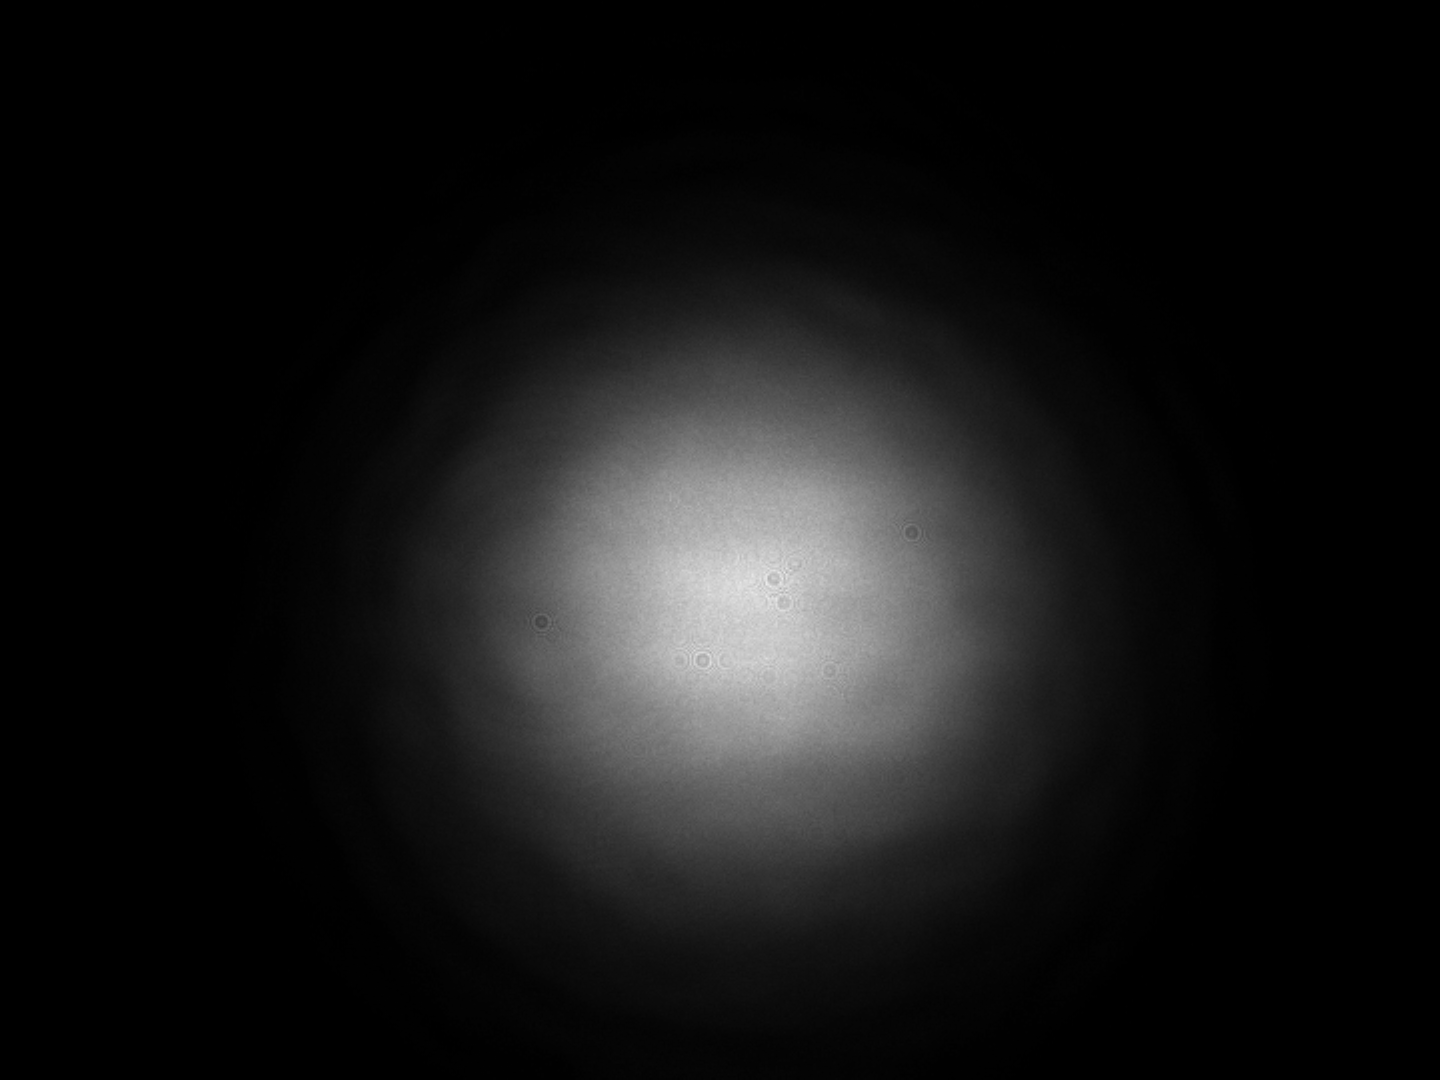

In [4]:
before_bs_r_data  = np.loadtxt("7_5ms_632nm_before_bs013_r.txt")

before_bs_r = np.array(before_bs_r_data ,dtype="uint8")

Image.fromarray(before_bs_r,mode="L")




### Choosing axis for Intensity Measurement

Text(0.5, 1.0, 'Intensity x(axis)')

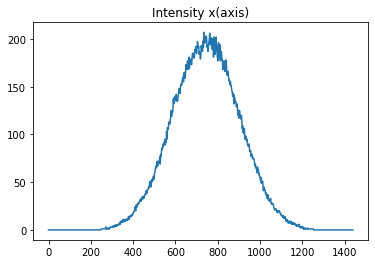

In [5]:
axis_num=550

plt.plot(before_bs_r_data[axis_num])
plt.title("Intensity x(axis)")



In [6]:

before_bs_r_list_x=before_bs_r_data[axis_num].tolist()

y_range_um = np.arange(0, 1440)*3.45



In [7]:
# Values of the Fit

H_2, A_2, x0_2, sigma_2, fwhm_2 = gauss_fit(y_range_um, before_bs_r_list_x)

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


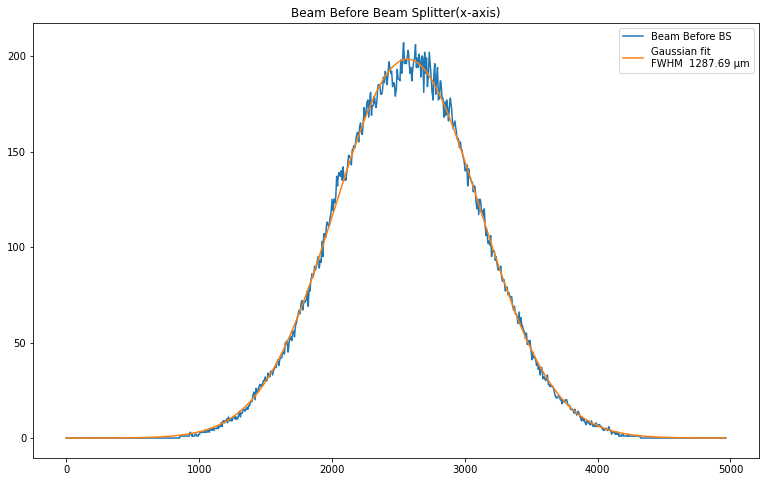

In [9]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,before_bs_r_data[axis_num], label="Beam Before BS  ")
plt.plot(y_range_um, gauss(y_range_um, H_2, A_2, x0_2, sigma_2),  label='Gaussian fit\nFWHM  %.2f μm' %fwhm_2)

plt.title('Beam Before Beam Splitter(x-axis)')
plt.legend()

## Focus at Camera

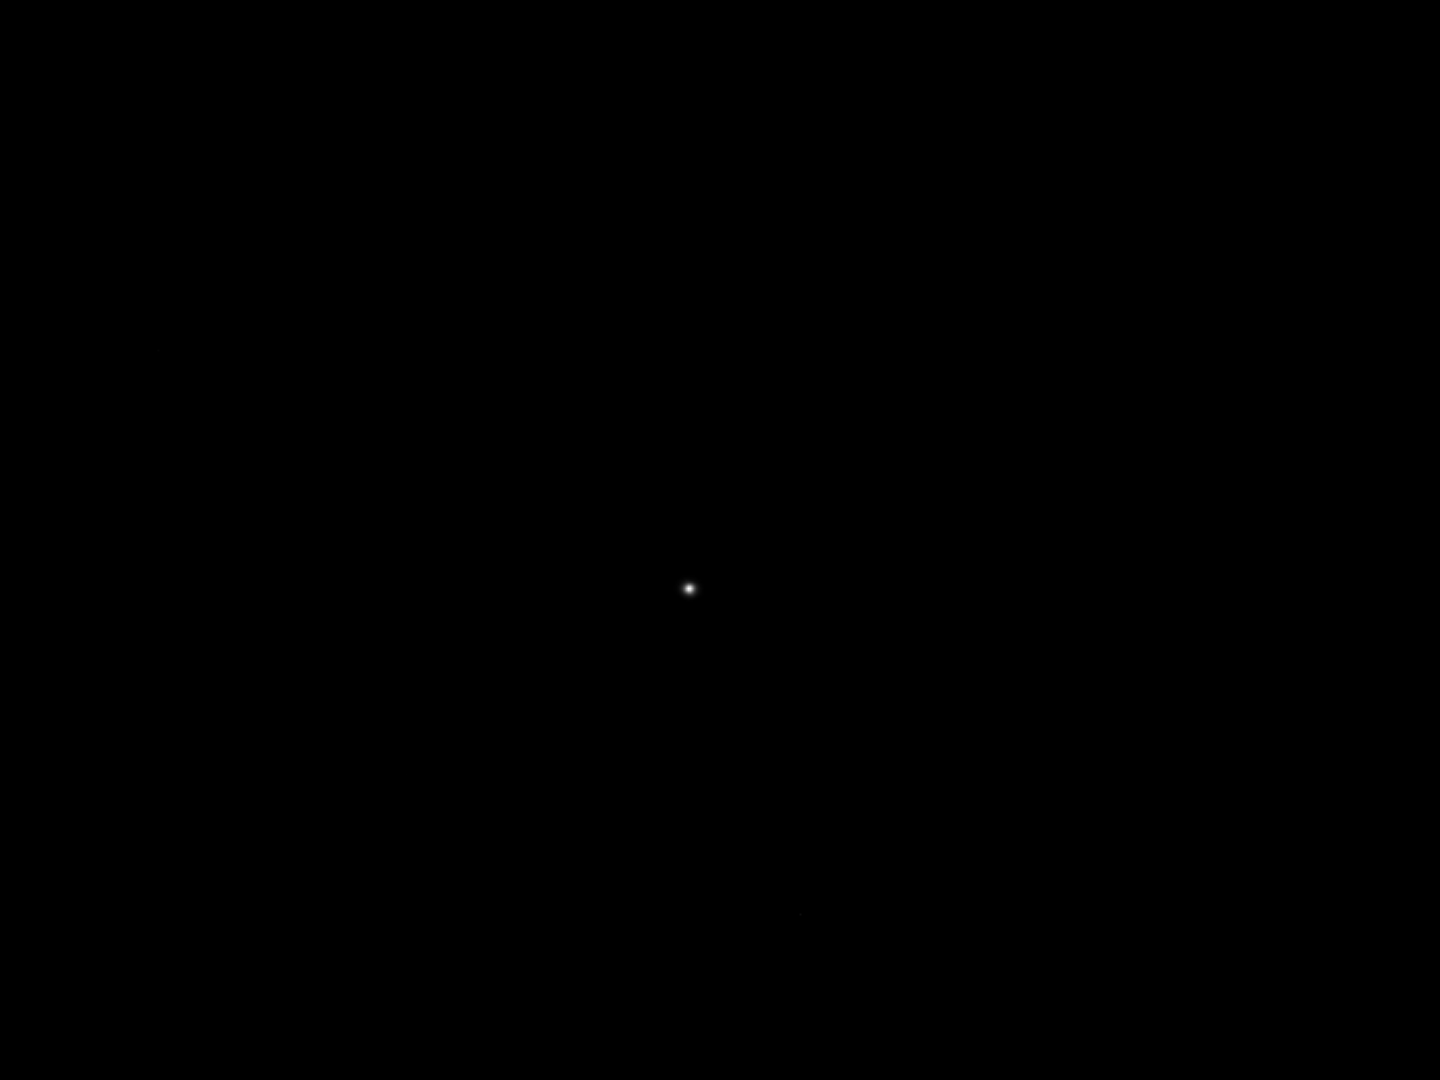

In [10]:
""" 
camera_z__2 = np.loadtxt("1_5ms_632nm_camera_200mm_z_-2_r.txt")
camera_z__1 = np.loadtxt("1_5ms_632nm_camera_200mm_z_-1_r.txt")
camera_z_1 = np.loadtxt("1_5ms_632nm_camera_200mm_z_1_r.txt")
camera_z_2 = np.loadtxt("1_5ms_632nm_camera_200mm_z_2_r.txt")
"""

camera_z_0 = np.loadtxt("1_3ms_632nm_camera_200mm_r.txt")
camera_mirror = np.loadtxt("1_2ms_632nm_with_mirror-camera_200mm_r.txt")

camera_z_0_img = np.array(camera_z_0 ,dtype="uint8")

Image.fromarray(camera_z_0_img,mode="L")




### Choosing axis for Intensity Measurement

In [11]:
np.where(camera_z_0 == camera_z_0.max())
np.where(camera_mirror== camera_mirror.max())

(array([436]), array([626]))

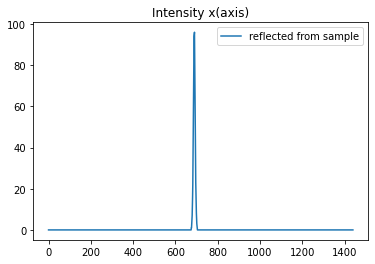

In [12]:
axis_num=593



plt.plot(camera_z_0[axis_num],label="reflected from sample")
""" 
plt.plot(camera_z__1[axis_num],label="z=-1")
plt.plot(camera_z__2[axis_num],label="z=-2")
plt.plot(camera_z_2[axis_num],label="z=2")
plt.plot(camera_z_1[axis_num],label="z=1")
"""
plt.title("Intensity x(axis)")
plt.legend()



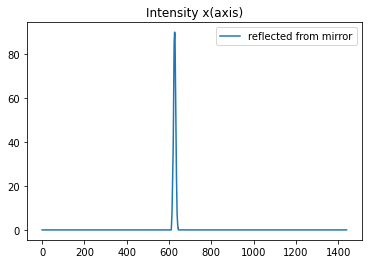

In [13]:
axis_num_mirror= 430

plt.plot(camera_mirror[axis_num_mirror],label="reflected from mirror")
plt.title("Intensity x(axis)")
plt.legend()

In [15]:
camera_mirror_list=camera_mirror[axis_num_mirror].tolist()
camera_z_0_list=camera_z_0[axis_num].tolist()



In [16]:
fwhm_mirror = gauss_fit(y_range_um, camera_mirror_list)[4]
fwhm_z_0 = gauss_fit(y_range_um, camera_z_0_list)[4]



/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [17]:
fwhm_z_0,fwhm_mirror

(33.46120042834143, 43.05479339143142)

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


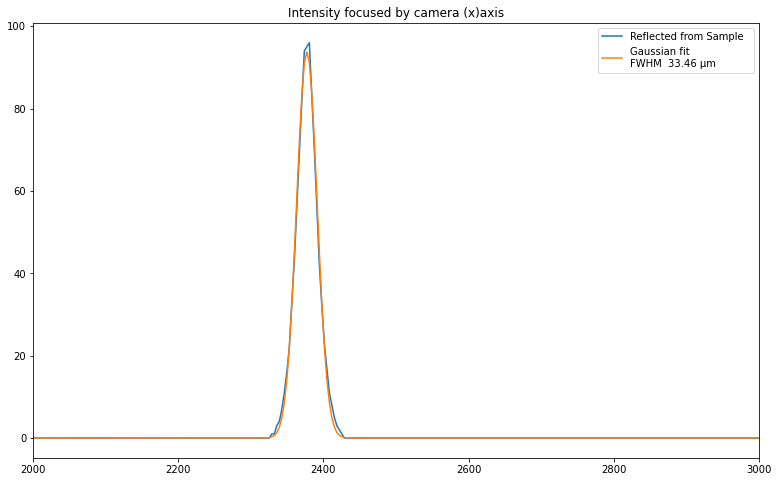

In [22]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_z_0[axis_num], label="Reflected from Sample  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_z_0_list)[0:4]),  label='Gaussian fit\nFWHM  %.2f μm' %fwhm_z_0)
plt.xlim(2000,3000)
plt.title('Intensity focused by camera (x)axis')
plt.legend()

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


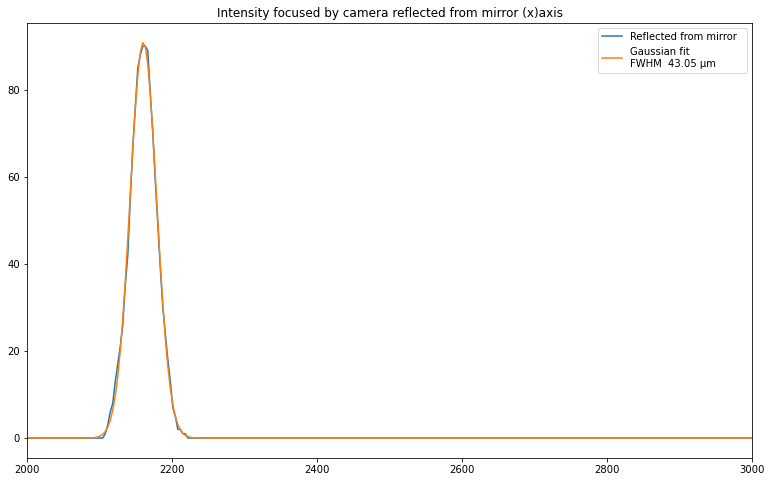

In [23]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_mirror[axis_num_mirror], label="Reflected from mirror  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_mirror_list)[0:4]),  label='Gaussian fit\nFWHM  %.2f μm' %fwhm_mirror)
plt.xlim(2000,3000)
plt.title('Intensity focused by camera reflected from mirror (x)axis')
plt.legend()

# Simulation

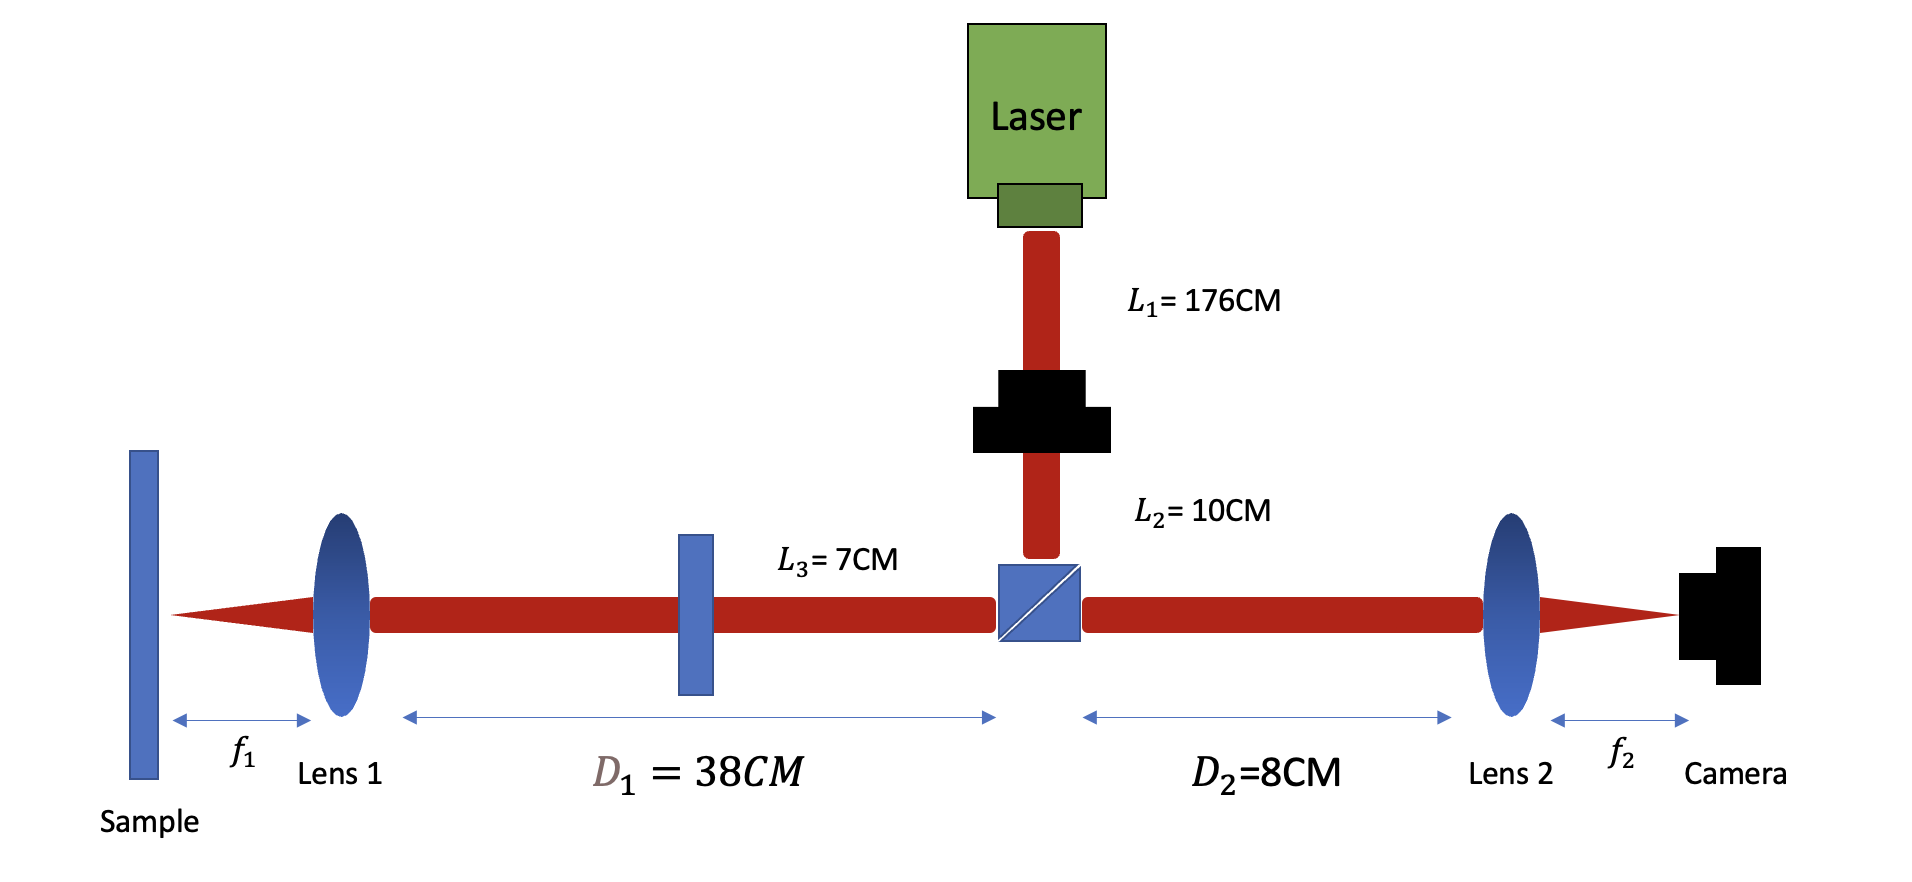

In [24]:
from IPython.display import Image
Image(filename='Optic Path Setup.png') 

In [25]:

from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_drawing import draw_several_fields
from diffractio.utils_optics import beam_width_1D, FWHM2D, MTF_ideal, MTF_parameters,FWHM1D
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
import math

number of processors: 8
total memory        : 8.0 Gb
available memory    : 5 %
max frequency       : 2400 GHz
cv2 not imported. Function send_image_screen cannot be used


## Parameters Of GaussBeam

In [26]:


FWHM_x = 1291 *um #measured in the experiment 

beam_waist = FWHM_x/np.sqrt(2*math.log(2)) #https://en.wikipedia.org/wiki/Gaussian_beam
beam_diameter = FWHM_x * 1.7 #um

w0 = 0.358 # mm https://www.thorlabs.com/thorproduct.cfm?partnumber=HNL100R#ad-image-0
z_ray = 10**3*math.pi*w0**2/632.8 #m


In [27]:
w = w0 * np.sqrt(1 + (1.76 / z_ray)**2) #m
2*w*10**3, beam_diameter #um

(2105.9585275698487, 2194.7)

In [28]:
#Sample Size

num_sample=  200000

L1 = 1760*mm
L2 = 100*mm
L3 = 70*mm
D1 = 380*mm
D2 = 80*mm

#Diameter

objective_diameter = 12 * mm
second_lens_diameter = 25.4 * mm

#Focal Length

focal_length_objective = 13.3 * mm 
focal_length_second_lens = 194 * mm


#Range

range_of_second_lens = np.linspace(-second_lens_diameter/2 - 10 * um, second_lens_diameter/2 + 10 * um, num_sample)

#Definition of Sources

wavelength = 0.632 * um

objective = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)
second_lens = Scalar_mask_X(x=range_of_second_lens, wavelength=wavelength)

objective.lens(x0=0.0, focal=focal_length_objective, radius=objective_diameter/ 2)
second_lens.lens(x0=0.0, focal=focal_length_second_lens, radius=second_lens_diameter/ 2)


#dx um
dx_second_lens= (second_lens_diameter + 20*um)/num_sample


# Flat mirror


421.51281360762914

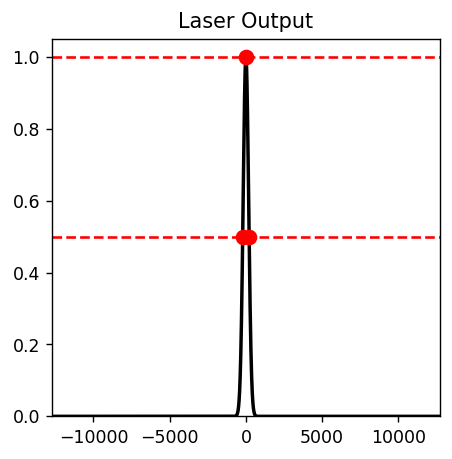

In [29]:
#Laser Output

laser_output = Scalar_source_X(x=range_of_second_lens, wavelength=wavelength)
laser_output.gauss_beam(A=1,x0=0,z0=0*mm,w0=w0*mm,theta=0 * degrees) 

fwhm_incident_beam = FWHM1D(laser_output.x,laser_output.intensity(),has_draw= True)
plt.title("Laser Output")
fwhm_incident_beam

In [31]:
incident_gauss_beam = laser_output.RS(z=L1+L2+2*L3+D2)

Good result: factor 810.47


1439.2516063255425

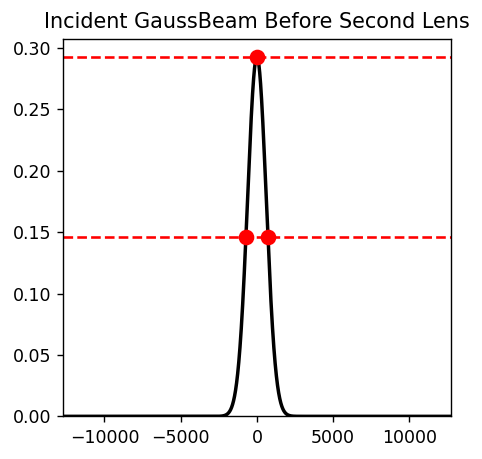

In [32]:
fwhm_incident_beam = FWHM1D(incident_gauss_beam.x,incident_gauss_beam.intensity(),has_draw= True)
plt.title("Incident GaussBeam Before Second Lens")
fwhm_incident_beam

In [33]:
incident_beam_just_after_second_lens = incident_gauss_beam * second_lens

In [34]:
shift_in_focal_length_2 = -19.9* mm

In [35]:

second_lens_focus = incident_beam_just_after_second_lens.RS( z= focal_length_second_lens- shift_in_focal_length_2 ,new_field=True, verbose=True)

Good result: factor 83.80


In [36]:
fwhm_cam_200mm = FWHM1D(second_lens_focus.x, np.abs(second_lens_focus.u)**2,has_draw= False)
fwhm_cam_200mm

43.298539948957114

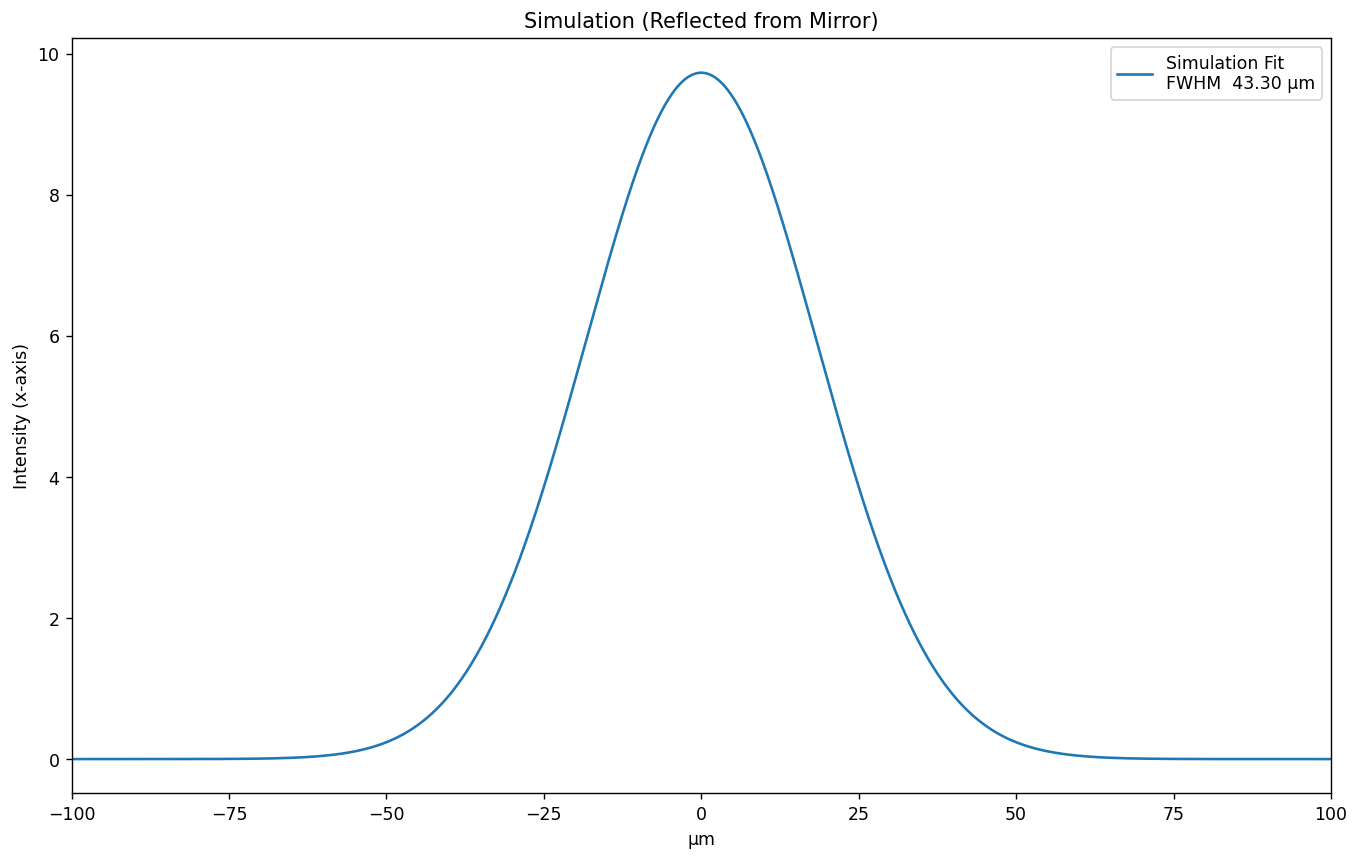

In [37]:
fig = plt.figure(figsize=(13, 8))

plt.plot(second_lens_focus.x,np.abs(second_lens_focus.u)**2,label='Simulation Fit \nFWHM  %.2f μm' %fwhm_cam_200mm)
plt.xlim(-100,100)
plt.xlabel("µm")
plt.ylabel("Intensity (x-axis)")
plt.title("Simulation (Reflected from Mirror)")
plt.legend()

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


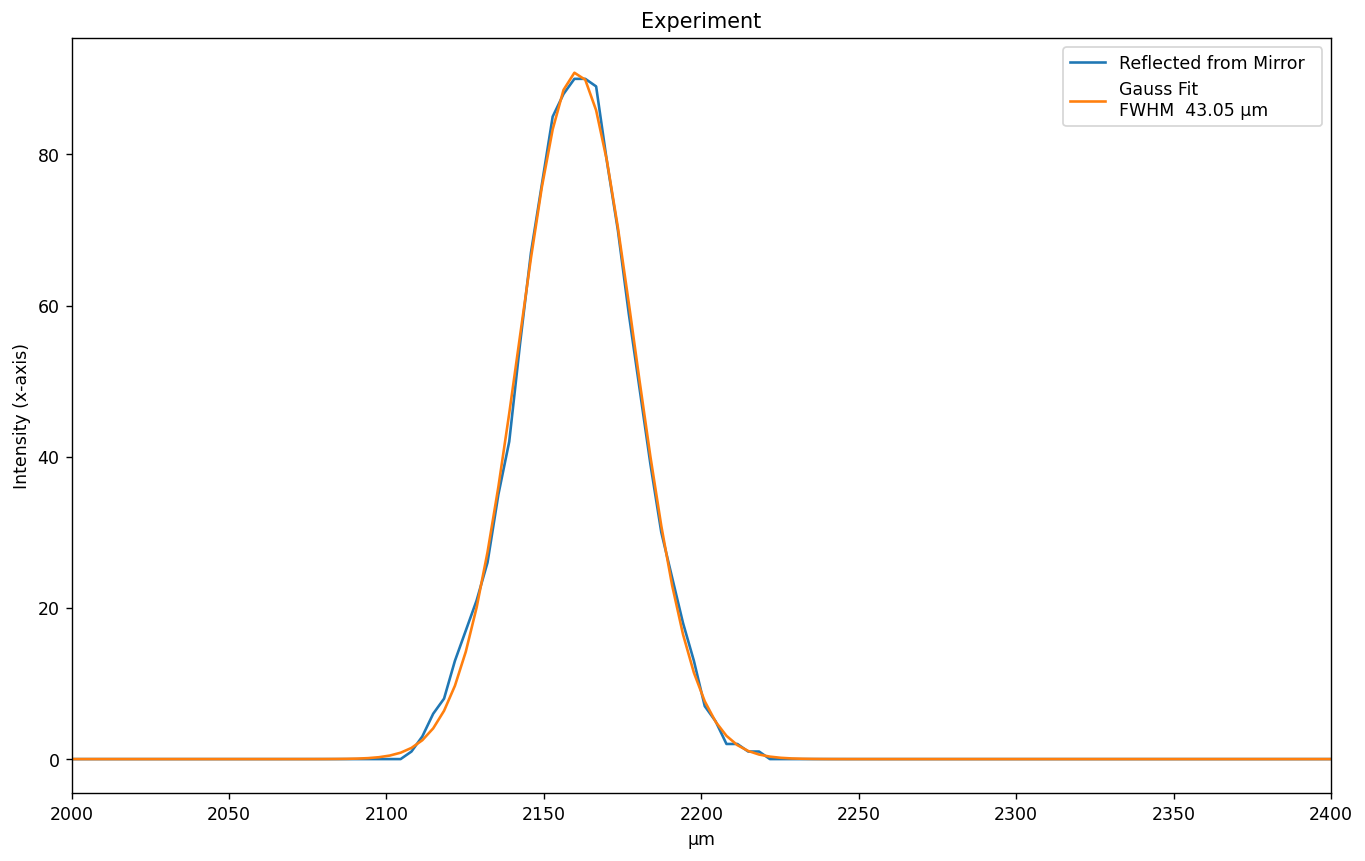

In [38]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_mirror[axis_num_mirror], label="Reflected from Mirror  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_mirror_list)[0:4]),  label='Gauss Fit \nFWHM  %.2f μm' %fwhm_mirror)
plt.xlim(2000,2400)
plt.xlabel("µm")
plt.ylabel("Intensity (x-axis)")
plt.title('Intensity focused by camera reflected from mirror (x)axis')
plt.title("Experiment")
plt.legend()

# Optic Path

In [39]:
before_objective = laser_output.RS(z=L1+L2+D1)

Good result: factor 872.55


1540.778355512297

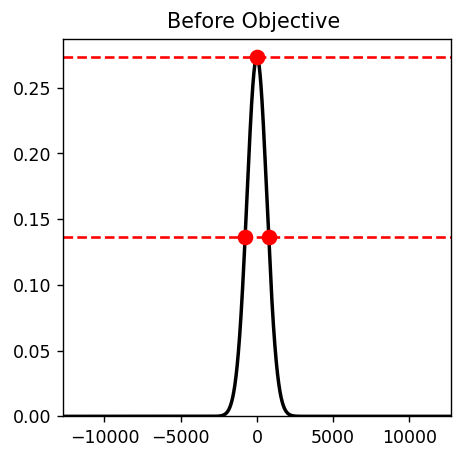

In [40]:
fwhm_before_objective = FWHM1D(before_objective.x, np.abs(before_objective.u)**2,has_draw= True)
plt.title("Before Objective ")
fwhm_before_objective

In [41]:
just_after_objective = before_objective * objective


In [42]:
shift_in_focal_length = 0.066*mm
objective_focus = just_after_objective.RS(z=focal_length_objective-shift_in_focal_length) 

Good result: factor 7.18


In [43]:
fwhm_objective_focus = FWHM1D(objective_focus.x, np.abs(objective_focus.u)**2,has_draw= False)

fwhm_objective_focus

14.760920807364528

In [44]:
before_objective_twice =just_after_objective.RS(z=2*(focal_length_objective-shift_in_focal_length)) 
just_after_objective_twice = before_objective_twice * objective

Good result: factor 11.49


1502.3377058945935

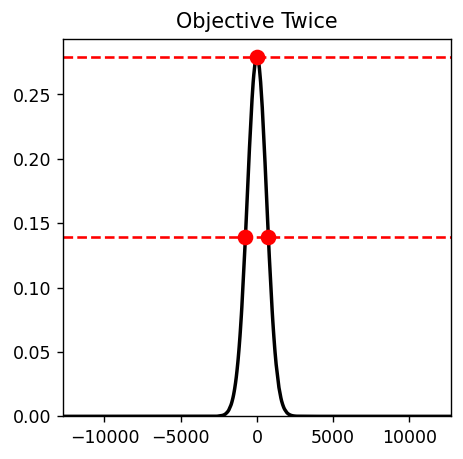

In [45]:
fwhm_objective_twice= FWHM1D(just_after_objective_twice.x, np.abs(just_after_objective_twice.u)**2,has_draw= True)
plt.title("Objective Twice")
fwhm_objective_twice


In [46]:
before_second_lens = just_after_objective_twice.RS(z=D1 + D2)

Good result: factor 179.87


In [47]:
just_after_second_lens = before_second_lens * second_lens


camera_focus = just_after_second_lens.RS(z=focal_length_second_lens-shift_in_focal_length_2)

Good result: factor 83.80


In [48]:
fwhm_camera_optic= FWHM1D(camera_focus.x, np.abs(camera_focus.u)**2,has_draw= False)
#plt.title("Camera 200mm (optic path)")
#plt.xlim(-400,400)
fwhm_camera_optic


39.84105576589536

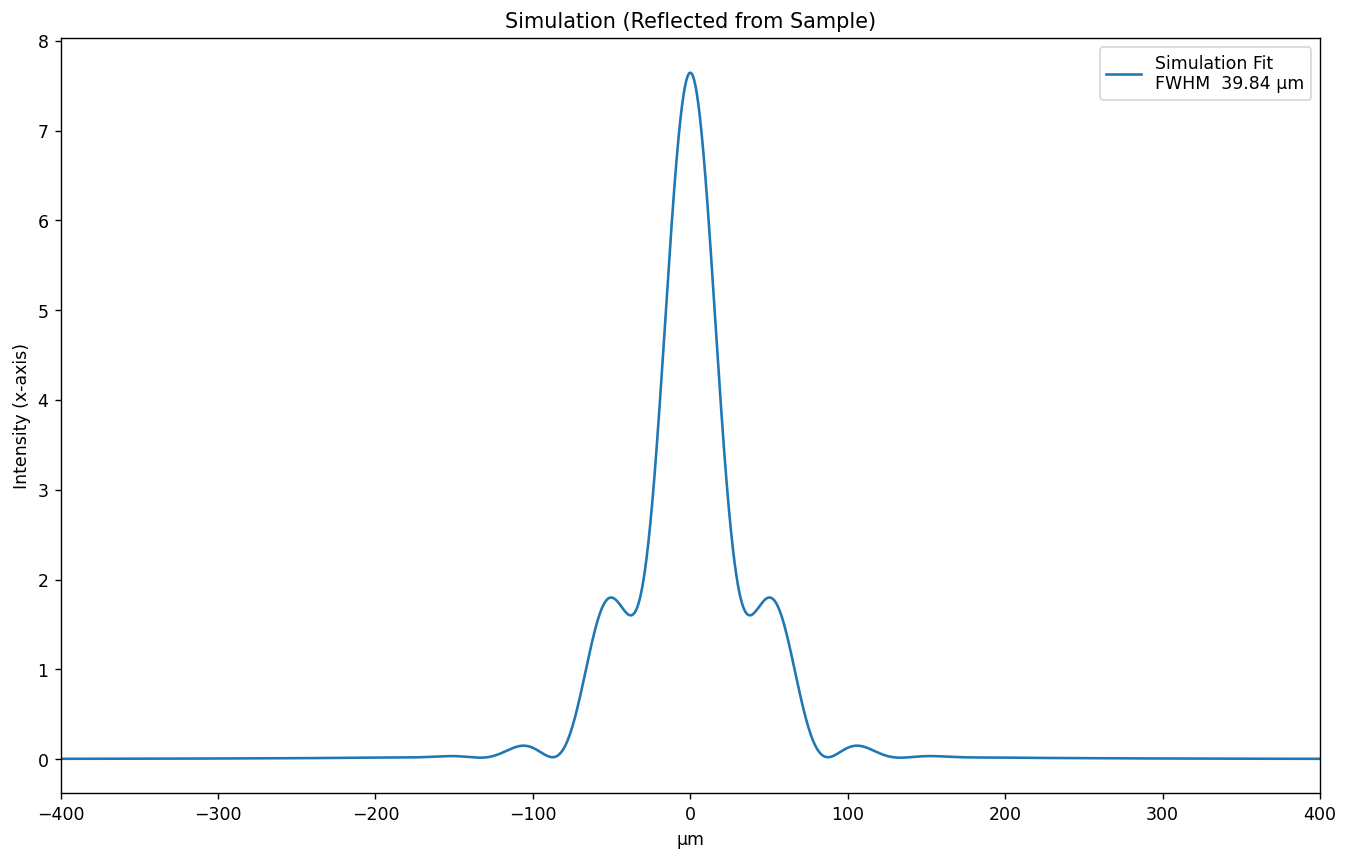

In [49]:
fig = plt.figure(figsize=(13, 8))

plt.plot(camera_focus.x,np.abs(camera_focus.u)**2,label='Simulation Fit \nFWHM  %.2f μm' %fwhm_camera_optic)
plt.xlim(-400,400)
plt.xlabel("µm")
plt.ylabel("Intensity (x-axis)")
plt.title("Simulation (Reflected from Sample)")
plt.legend()

/Users/nickolayerintitov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


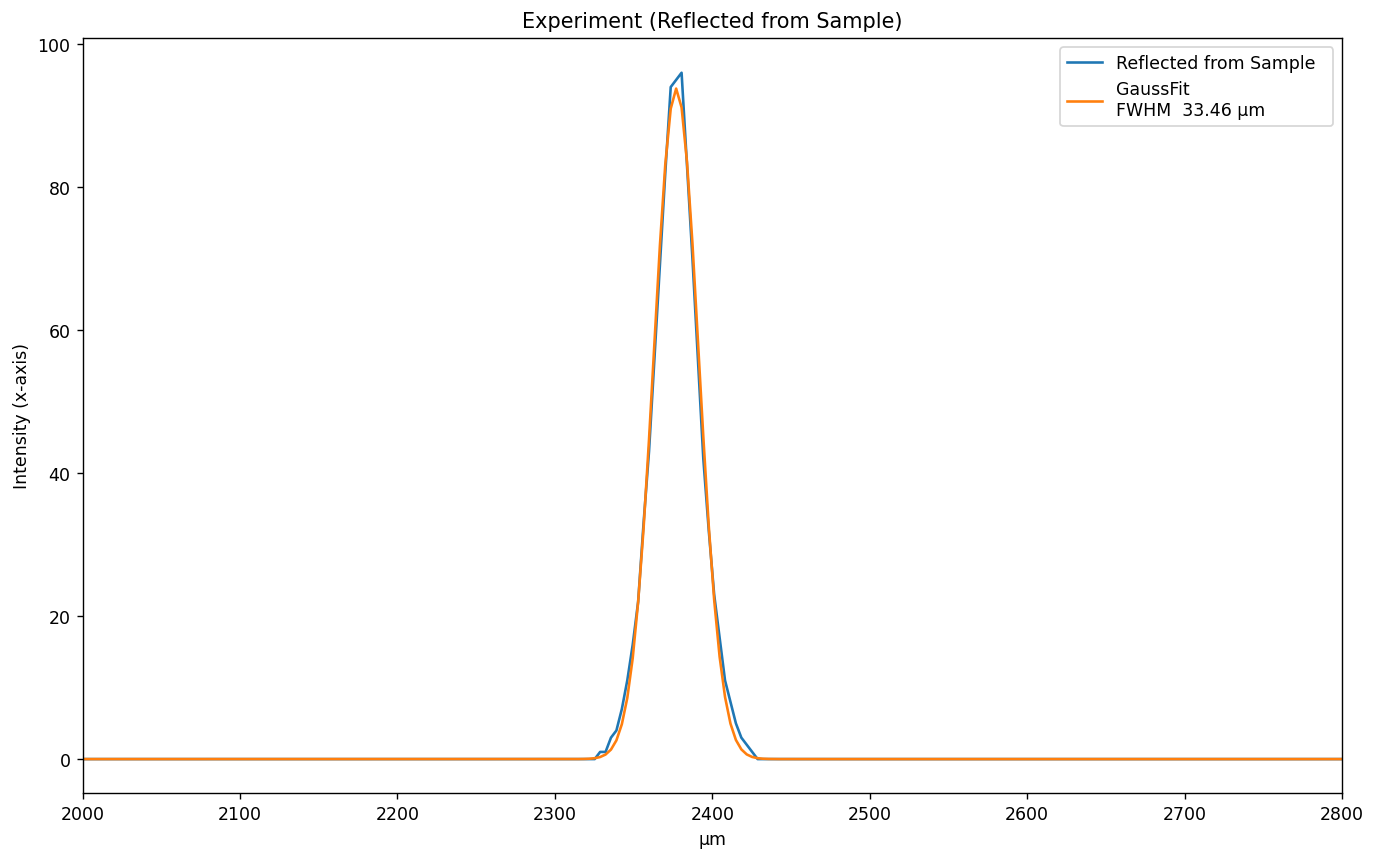

In [50]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,camera_z_0[axis_num], label="Reflected from Sample  ")
plt.plot(y_range_um, gauss(y_range_um,*gauss_fit(y_range_um, camera_z_0_list)[0:4]),  label='GaussFit \nFWHM  %.2f μm' %fwhm_z_0)
plt.xlim(2000,2800)
plt.xlabel("µm")
plt.ylabel("Intensity (x-axis)")
plt.title("Experiment (Reflected from Sample)")
plt.legend()

# Optic Path (XY)

In [12]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_optics import beam_width_1D, FWHM1D, MTF_ideal, MTF_parameters, FWHM2D

In [13]:
num_sample_XY = 5500
range_XY = np.linspace(-1.5*mm, 1.5*mm, num_sample_XY)

In [14]:
""" 
objective_XY = Scalar_mask_XY(x=range_XY, y=range_XY, wavelength=wavelength)
objective_XY.lens(r0=(0 * um, 0 * um),
        radius=(objective_diameter / 2, objective_diameter / 2),
        focal=(focal_length_objective, focal_length_objective))
"""

second_lens_XY = Scalar_mask_XY(x=range_XY, y=range_XY, wavelength=wavelength)
second_lens_XY.lens(r0=(0 * um, 0 * um),
        radius=(second_lens_diameter / 2, second_lens_diameter / 2),
        focal=(focal_length_second_lens, focal_length_second_lens))

In [15]:
laser_output_XY= Scalar_source_XY(x=range_XY, y=range_XY, wavelength=wavelength)
laser_output_XY.gauss_beam(r0=(0,0),w0=(w0,w0),z0=0)

In [16]:
incident_beam_XY= laser_output_XY.RS(z=L1+L2+2*L3+D2)

In [17]:
just_after_second_lens_XY = incident_beam_XY * second_lens_XY

In [21]:
camera_focus_mirror =just_after_second_lens_XY.RS(z= focal_length_second_lens- shift_in_focal_length_2)

In [22]:
camera_focus_mirror_fwhm = FWHM2D(camera_focus_mirror.x,camera_focus_mirror.y,camera_focus_mirror.intensity())
camera_focus_mirror_fwhm

(39.92756775032876, 39.92756775032876)

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fc88a2156a0>)

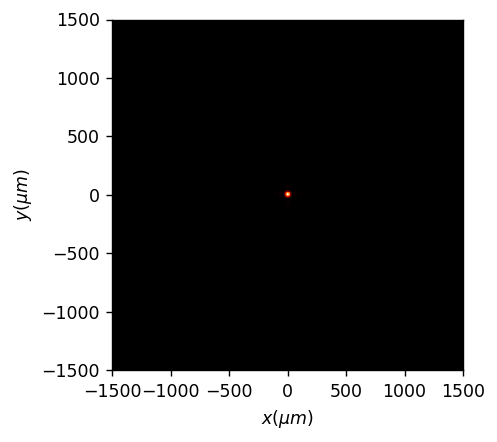

In [23]:
camera_focus_mirror.draw()

# Beam radius calculation

In [51]:
import numpy as np
import math

In [52]:
def gauss(x, H, A, x0, sigma):
    """ Calculate the probabilty density function (gauss_2d).
    x0 = expected value
    sigma = standart deviation
    A = height of the curve's peak
    """
    return  A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))


In [53]:
g_sigma = 0.34*np.sqrt(1/(-2*math.log(0.165)))
g_sigma

0.17910571602123887

In [54]:
x = g_sigma*2
print(gauss(x,0,1,0,g_sigma))
print(gauss(0.34,0,1,0,g_sigma))

0.1353352832366127
0.16499999999999987


In [55]:
x = g_sigma*2
x

0.35821143204247774